In [20]:
import os
import glob
from collections import Counter

import pandas as pd
import numpy as np
import seaborn as sns

from nltk.tokenize import word_tokenize

%matplotlib inline

In [2]:
data_path = 'data'

In [3]:
files = glob.glob(os.path.join(data_path, '*', '*'))

In [4]:
files

['data\\Data A\\data_dev_A.csv',
 'data\\Data A\\data_train_A.csv',
 'data\\Data A\\stimulus dan coding guidelines data A.txt',
 'data\\Data B\\data_dev_B.csv',
 'data\\Data B\\data_train_B.csv',
 'data\\Data B\\stimulus dan coding guidelines data B.txt']

In [5]:
d_train_a = pd.read_csv('data/Data A/data_train_A.csv')

In [6]:
d_train_b = pd.read_csv('data/Data B/data_train_B.csv')

In [7]:
d_dev_a = pd.read_csv('data/Data A/data_dev_A.csv')

In [8]:
d_dev_b = pd.read_csv('data/Data B/data_dev_B.csv')

In [9]:
d_train_a

,RES_ID,RESPONSE,LABEL
0,TRA1,intetraksi/beradaptasi terhadap lingkungan yan...,1
1,TRA2,seperti jatuhnya meteor tsunami gempa bumi,0
2,TRA3,hanya tuhan yang tahu tantangan nya itu apaan,0
3,TRA4,mereka akan sulit beradaptasi,1
4,TRA5,"Tempat tinggal, ekonomi, dan pekerjaan",1
5,TRA6,akan terganggu dengan kesehatanya karena merek...,1
6,TRA7,Mereka tidak akan di hormati oleh orang layakn...,0
7,TRA8,mereka akan kehilangan lahan pertanian.,1
8,TRA9,Pada kasus-kasus seperti salah satunya yang te...,0
9,TRA10,mendapat musibah dan melawannya,0


In [10]:
d_dev_a

,RES_ID,RESPONSE
0,DEVA1,karena di tempat tnggalnya tidak aman karena b...
1,DEVA2,"banyak yang menolak, susah mencari lapangan pe..."
2,DEVA3,ah berkomunikasi dengan wilyah yang mereka tem...
3,DEVA4,"tantangan yang akan mereka hadapi, seperti mer..."
4,DEVA5,Mereka akan tidak terbiasa dengan tempat baru
5,DEVA6,kehilangan pekerjaan dan sumber daya yang ada ...
6,DEVA7,dengan sikap yang tenang
7,DEVA8,Mencari tempat pengungsian
8,DEVA9,cuaca/atau suasana di perjalanan
9,DEVA10,Pengungsi iklim lingkungan baru yang berbeda d...


In [16]:
d_train_a.shape

(268, 3)

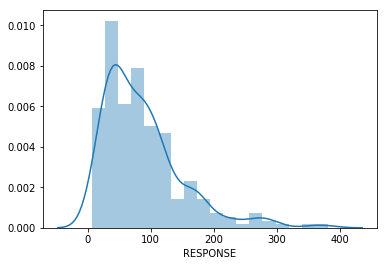

In [36]:
sns.distplot(d_train_a.RESPONSE.str.len())

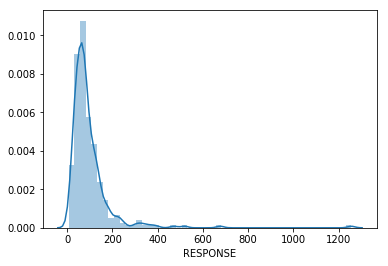

In [11]:
sns.distplot(d_train_b.RESPONSE.str.len())

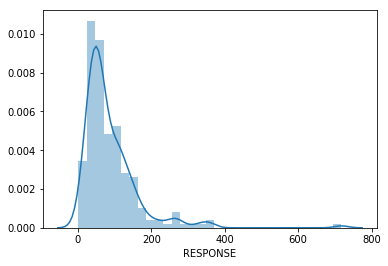

In [12]:
sns.distplot(d_dev_a.RESPONSE.str.len())

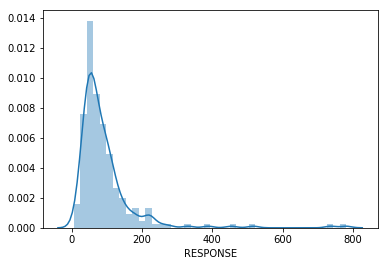

In [13]:
sns.distplot(d_dev_b.RESPONSE.str.len())

In [14]:
d_train = d_train_a.append(d_train_b)

In [15]:
d_train.reset_index(drop=True, inplace=True)

In [27]:
d_train['RESPONSE'] = d_train.RESPONSE.str.lower()

In [28]:
word_list = word_tokenize(" ".join(d_train.RESPONSE))

In [29]:
word_freq = dict(Counter(word_list))

In [30]:
d_word_freq = pd.DataFrame({'word': list(word_freq.keys()),'freq': list(word_freq.values())})

In [38]:
d_word_freq = d_word_freq[d_word_freq.word.str.len() > 1]

In [42]:
d_word_freq.sort_values(by = 'freq', ascending=0).to_csv('word_frequent.csv', index = False)

SyntaxError: invalid syntax (<ipython-input-40-6c49def14fcb>, line 1)